<img src="./images/banner.png" width="800">

# Beyond GLMs: Decision Trees for Classification

In our journey through machine learning algorithms, we've explored various approaches to classification. Before diving into decision trees, let's take a moment to categorize the different types of classifiers we've encountered and will encounter. This categorization will help us understand where decision trees fit in the broader landscape of machine learning algorithms.


Classification algorithms can be categorized in multiple ways, each highlighting different aspects of their functionality and approach:


1. Parametric vs. Non-parametric Models

    - **Parametric Models:** These make strong assumptions about the data distribution and have a fixed number of parameters.
      - Examples: Logistic Regression, Linear Discriminant Analysis
    - **Non-parametric Models:** These make fewer assumptions about the data and can grow in complexity with the dataset size.
      - Examples: Decision Trees, K-Nearest Neighbors


<img src="./images/parametric-nonparametric.png" width="500">

2. Linear vs. Non-linear Models

    - **Linear Models:** Assume a linear relationship between features and the target.
      - Example: Logistic Regression
    - **Non-linear Models:** Can capture more complex relationships.
      - Examples: Decision Trees, Neural Networks


<img src="./images/linear-nonlinear.ppm" width="500">

3. Probabilistic vs. Non-probabilistic Models

    - **Probabilistic Models:** Output probabilities for each class.
      - Examples: Naive Bayes, Logistic Regression
    - **Non-probabilistic Models:** Directly output class predictions without probabilities.
      - Examples: Support Vector Machines (SVMs), standard Decision Trees


4. Discriminative vs. Generative Models

    - **Discriminative Models:** Model the decision boundary between classes.
      - Examples: Logistic Regression, SVMs
    - **Generative Models:** Model the distribution of each class.
      - Example: Naive Bayes


<img src="./images/det-gen.avif" width="500">

5. Eager vs. Lazy Learners

    - **Eager Learners:** Build a model during training.
      - Examples: Decision Trees, Logistic Regression
    - **Lazy Learners:** Defer processing to classification time.
      - Example: K-Nearest Neighbors


<img src="./images/lazy-eager.jpg" width="500">

In this course, we're exploring a variety of classification algorithms that span these categories:

1. We started with Generalized Linear Models (GLMs), specifically Logistic Regression, which is a parametric, linear, probabilistic, discriminative, and eager learning model.

2. Now, we're moving to Decision Trees, which are non-parametric, non-linear, typically non-probabilistic (though can be adapted to be probabilistic), discriminative, and eager learning models.

3. In future lectures, we'll cover:
   - Naive Bayes: A parametric, probabilistic, generative, and eager learning model.
   - K-Nearest Neighbors: A non-parametric, non-linear, non-probabilistic, discriminative, and lazy learning model.
   - Support Vector Machines: A non-parametric, can be linear or non-linear, non-probabilistic, discriminative, and eager learning model.

4. We'll also explore ensemble methods:
   - Bagging (e.g., Random Forests): A technique that combines multiple models, often decision trees, to reduce overfitting and improve generalization.
   - Boosting (e.g., AdaBoost, Gradient Boosting): An approach that builds a strong learner from multiple weak learners, often decision trees, in a sequential manner.


Understanding these categories helps in selecting the right algorithm for a given problem and in interpreting the strengths and weaknesses of each approach.


Decision trees stand out in this landscape for several reasons:

1. **Interpretability:** Their hierarchical structure mimics human decision-making, making them easy to understand and explain.
2. **Flexibility:** They can handle both numerical and categorical data without the need for extensive preprocessing.
3. **Feature Importance:** They provide a clear view of which features are most important for classification.
4. **Non-linearity:** They can capture complex, non-linear relationships in the data.


🤔 **Why This Matters:** As we move beyond GLMs, decision trees offer a powerful and intuitive approach to classification that addresses some limitations of linear models while introducing new capabilities and challenges.


In the following sections, we'll dive deep into the mechanics of decision trees, exploring how they're built, optimized, and used in practice. We'll also see how they form the foundation for advanced ensemble methods like Random Forests and Gradient Boosting Machines.

**Table of contents**<a id='toc0_'></a>    
- [What are Decision Trees?](#toc1_)    
  - [A Simple Example](#toc1_1_)    
  - [Components of a Decision Tree](#toc1_2_)    
  - [Putting It All Together](#toc1_3_)    
- [Building a Decision Tree](#toc2_)    
  - [Top-down Induction Process](#toc2_1_)    
  - [Recursive Partitioning](#toc2_2_)    
  - [Stopping Criteria](#toc2_3_)    
- [Splitting Criteria](#toc3_)    
  - [Entropy and Information Gain](#toc3_1_)    
  - [Gini Impurity](#toc3_2_)    
  - [Comparison of Splitting Criteria](#toc3_3_)    
- [Simple Implementation Example](#toc4_)    
  - [Basic Algorithm Walkthrough](#toc4_1_)    
  - [Toy Dataset Demonstration](#toc4_2_)    
  - [Interpreting the Results](#toc4_3_)    
- [Summary and Next Steps](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[What are Decision Trees?](#toc0_)

Decision trees are powerful and intuitive models used in machine learning for both classification and regression tasks. In this lecture, we'll focus on their application in classification problems.


A decision tree is a flowchart-like structure that makes predictions by navigating from the root of the tree to a leaf node, following a path determined by decision rules at each internal node.


Imagine you're playing a game of "20 Questions" to guess an animal. You might start with broad questions like "Is it a mammal?" and gradually narrow down to more specific questions. This process is essentially how a decision tree works!


Decision trees offer several unique advantages:

1. **Interpretability:** They mimic human decision-making processes, making them easy to understand and explain.
2. **Versatility:** They can handle both numerical and categorical data without extensive preprocessing.
3. **Non-linearity:** They can capture complex, non-linear relationships in the data.
4. **Feature importance:** They provide clear insights into which features are most crucial for classification.


Visualizing a decision tree can greatly aid in understanding both the model and the data it's trained on.


### <a id='toc1_1_'></a>[A Simple Example](#toc0_)


Let's consider a classic example: predicting whether to play tennis based on weather conditions.

```
                 Outlook
                /   |   \
              /     |     \
           Sunny  Overcast  Rain
           /         |        \
         /           |          \
    Humidity     Play=Yes      Windy
    /     \                   /     \
 High     Normal          Strong   Weak
  |         |               |        |
Play=No   Play=Yes       Play=No   Play=Yes
```


This tree shows how decisions are made based on different weather attributes, leading to a final classification of whether to play tennis or not.


🤔 **Why This Matters:** Unlike linear models that use a single equation, decision trees can capture complex decision boundaries and provide insights into the decision-making process.


### <a id='toc1_2_'></a>[Components of a Decision Tree](#toc0_)


A decision tree consists of several key components, each playing a crucial role in the classification process.


<img src="./images/decision-tree.png" width="500">

1. **Root Node:**

- The topmost node in the tree
- Represents the best predictor variable
- The first decision point in the classification process

In our tennis example, "Outlook" is the root node.


2. **Internal Nodes:**

- Nodes that test the value of a certain attribute
- Each internal node corresponds to one of the input variables
- Splits the data based on the test condition

"Humidity" and "Windy" are internal nodes in our example.


3. **Branches:**

- The outcomes of a test, connecting one node to another
- Represent the possible values of the attribute being tested
- Guide the flow from one node to the next

The lines connecting nodes (e.g., "Sunny", "Overcast", "Rain") are branches.


4. **Leaf Nodes (Terminal Nodes):**

- The final nodes that predict the class label
- No further splitting occurs at these nodes
- Represent the final classification decision

In our example, nodes with "Play=Yes" or "Play=No" are leaf nodes.


5. **Decision Path:**

- The sequence of nodes and branches from the root to a leaf node
- Represents the series of decisions made to arrive at a classification

For instance: Outlook=Sunny → Humidity=Normal → Play=Yes is a decision path.


<img src="./images/game-decision-tree.png" width="800">

❗️ **Important Note:** The depth of a decision tree is the length of the longest path from the root to a leaf. Controlling the depth is crucial in preventing overfitting.


### <a id='toc1_3_'></a>[Putting It All Together](#toc0_)


When classifying a new instance:
1. Start at the root node
2. Evaluate the feature specified by the node
3. Follow the appropriate branch based on the feature value
4. Repeat steps 2-3 until reaching a leaf node
5. The leaf node's class is the predicted classification


By understanding these components, we can see how decision trees break down complex decisions into a series of simple, interpretable choices. This structure allows decision trees to handle non-linear relationships and interactions between features naturally, making them a powerful tool in a data scientist's toolkit.


In the next section, we'll explore how these trees are actually constructed, diving into the algorithms that determine the best ways to split the data and grow the tree.

## <a id='toc2_'></a>[Building a Decision Tree](#toc0_)

Now that we understand the components of a decision tree, let's dive into how these trees are actually constructed. The process of building a decision tree is often referred to as "induction."


### <a id='toc2_1_'></a>[Top-down Induction Process](#toc0_)


Decision trees are typically built using a top-down approach, also known as recursive partitioning. This method starts at the root node and progressively splits the data into subsets, moving down the tree.


The top-down induction process aims to create a tree that accurately classifies the training data while avoiding overfitting.


The general steps in this process are:

1. Start with the entire dataset at the root node.
2. Select the best feature to split the data.
3. Create child nodes for each possible value of the selected feature.
4. Repeat steps 2-3 for each child node until a stopping criterion is met.


💡 **Tip:** The "best" feature to split on is typically determined by a metric such as information gain or Gini impurity, which we'll cover in the next section.


### <a id='toc2_2_'></a>[Recursive Partitioning](#toc0_)


Recursive partitioning is the heart of the decision tree building process. It's called "recursive" because the same process is applied repeatedly to each subset of the data.


Here's a more detailed look at how it works:

1. **Feature Selection:** For each node, evaluate all available features and select the one that best splits the data according to a chosen criterion.

2. **Data Splitting:** Divide the data at the current node based on the selected feature.

3. **Child Node Creation:** Create a new child node for each possible value of the selected feature.

4. **Recursion:** For each child node, repeat steps 1-3 on the subset of data that reaches that node.

5. **Termination:** Stop when a stopping criterion is met (e.g., all samples in a node belong to the same class, or the tree reaches a maximum depth).


Let's illustrate this with a simple example:


```python
def build_tree(data):
    if stopping_criterion_met(data):
        return create_leaf_node(data)
    
    best_feature = find_best_split(data)
    node = create_internal_node(best_feature)
    
    for value in unique_values(data[best_feature]):
        subset = data[data[best_feature] == value]
        child = build_tree(subset)
        add_child_to_node(node, child, value)
    
    return node
```


This pseudocode demonstrates the recursive nature of the tree-building process.


🤔 **Why This Matters:** Recursive partitioning allows the decision tree to automatically handle interactions between features and capture complex patterns in the data.


### <a id='toc2_3_'></a>[Stopping Criteria](#toc0_)


Without proper stopping criteria, a decision tree could potentially grow until each leaf node contains only one sample, leading to overfitting. Several stopping criteria are commonly used to prevent this:

1. **Maximum Depth:** Stop growing the tree once it reaches a specified maximum depth.
   
   ```python
   if current_depth >= max_depth:
       return create_leaf_node(data)
   ```

2. **Minimum Samples per Leaf:** Stop splitting if a node has fewer than a specified number of samples.
   
   ```python
   if len(data) <= min_samples_leaf:
       return create_leaf_node(data)
   ```

3. **Minimum Impurity Decrease:** Stop if a split would result in an impurity decrease less than a specified threshold.
   
   ```python
   if impurity_decrease < min_impurity_decrease:
       return create_leaf_node(data)
   ```

4. **Pure Node:** Stop if all samples in a node belong to the same class.
   
   ```python
   if len(unique(data['target'])) == 1:
       return create_leaf_node(data)
   ```


❗️ **Important Note:** The choice of stopping criteria significantly impacts the tree's complexity and its tendency to overfit or underfit the data.


These stopping criteria are often used in combination to achieve a balance between model complexity and accuracy. Tuning these parameters is a crucial part of the model optimization process.


Building a decision tree through top-down induction and recursive partitioning is a powerful method for creating interpretable and effective classification models. By understanding this process, we gain insight into how decision trees capture patterns in data and make predictions.


In the next section, we'll delve deeper into the splitting criteria used to select the best features at each node, which is crucial for building effective decision trees.

## <a id='toc3_'></a>[Splitting Criteria](#toc0_)


One of the most crucial aspects of building an effective decision tree is determining how to split the data at each node. This is where splitting criteria come into play. These criteria help us quantify the quality of a split and choose the best feature to split on at each step.


Splitting criteria measure how well a potential split separates the classes in a dataset. The goal is to find splits that create the "purest" possible child nodes.


### <a id='toc3_1_'></a>[Entropy and Information Gain](#toc0_)


**Entropy** is a measure of impurity or uncertainty in a set of examples. In the context of decision trees, it quantifies the disorder in the class labels of a node.


For a binary classification problem, entropy is defined as:

$H(S) = -p_+ \log_2(p_+) - p_- \log_2(p_-)$

Where:
- $S$ is the set of examples
- $p_+$ is the proportion of positive examples
- $p_-$ is the proportion of negative examples

For example, if you have a dataset of 100 examples, where 60 are positive and 40 are negative:

- $p_+ = 60/100 = 0.6$
- $p_- = 40/100 = 0.4$

💡 **Pro Tip:** Entropy is at its maximum (1) when the classes are equally represented, and at its minimum (0) when all examples belong to the same class. For example let's say there are two farms with 10 sheeps, if one farm has 5 sheeps and the other has 5 sheeps, the entropy is 1, but if one farm has 10 sheeps and the other has 0 sheeps, the entropy is 0.

<img src="./images/entropy.png" width="800">

**Information Gain** measures the reduction in entropy achieved by splitting on a particular feature. It's calculated as the difference between the entropy of the parent node and the weighted sum of entropies of the child nodes:

$IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)$

Where:
- $S$ is the set of examples in the parent node
- $A$ is the feature being considered for the split
- $S_v$ is the subset of $S$ for which feature $A$ has value $v$

The feature with the highest information gain is chosen for the split.


### <a id='toc3_2_'></a>[Gini Impurity](#toc0_)


Gini Impurity is an alternative to entropy that measures the probability of incorrectly classifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the subset.


For a binary classification problem, Gini Impurity is defined as:

$Gini(S) = 1 - (p_+^2 + p_-^2)$

Where $p_+$ and $p_-$ are the proportions of positive and negative examples in the set $S$.


To evaluate a potential split, we calculate the weighted sum of the Gini Impurities of the resulting child nodes:

$Gini_{split} = \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Gini(S_v)$


The feature that results in the lowest Gini split is chosen.


🤔 **Why This Matters:** The choice of splitting criterion can affect the structure of the resulting tree and, consequently, its performance on unseen data.


### <a id='toc3_3_'></a>[Comparison of Splitting Criteria](#toc0_)


Both Entropy/Information Gain and Gini Impurity are widely used and often produce similar results. However, there are some differences to consider:

1. **Computational Efficiency:** Gini Impurity is slightly faster to compute as it doesn't involve logarithms.

2. **Sensitivity:** Information Gain tends to favor features with more categories, while Gini Impurity is less sensitive to the number of categories.

3. **Interpretability:** Some argue that entropy is more intuitive as it's based on information theory principles.

4. **Splitting Behavior:** Gini tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce more balanced trees.


Here's a visual comparison of how Entropy and Gini Impurity behave for a binary classification problem:


/var/folders/g_/1vbng5jn1nv9ztt7z6_k8lg00000gn/T/ipykernel_3967/3773398892.py:5: RuntimeWarning: divide by zero encountered in log2
  return -p * np.log2(p) - (1-p) * np.log2(1-p)
/var/folders/g_/1vbng5jn1nv9ztt7z6_k8lg00000gn/T/ipykernel_3967/3773398892.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  return -p * np.log2(p) - (1-p) * np.log2(1-p)


Text(0.5, 1.0, 'Entropy vs Gini Impurity')

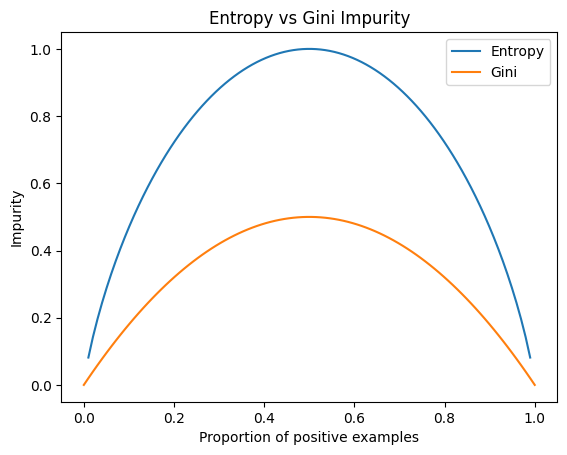

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def entropy(p):
    return -p * np.log2(p) - (1-p) * np.log2(1-p)

def gini(p):
    return 1 - (p**2 + (1-p)**2)

p = np.linspace(0, 1, 100)
plt.plot(p, [entropy(x) for x in p], label='Entropy')
plt.plot(p, [gini(x) for x in p], label='Gini')
plt.xlabel('Proportion of positive examples')
plt.ylabel('Impurity')
plt.legend()
plt.title('Entropy vs Gini Impurity')

❗️ **Important Note:** In practice, the choice between Entropy and Gini Impurity often doesn't significantly impact the performance of the final model. Other factors, such as pruning and regularization, typically have a larger effect.


Understanding splitting criteria is crucial for grasping how decision trees make choices about which features to use and where to place splits. These criteria form the backbone of the tree induction process, guiding the algorithm towards creating a tree structure that effectively separates the classes in the training data.

In the next section, we'll look at a simple implementation example to see how these concepts come together in practice.

## <a id='toc4_'></a>[Simple Implementation Example](#toc0_)

To solidify our understanding of decision trees, let's walk through a basic implementation and demonstrate it on a toy dataset. This example will tie together the concepts we've discussed: tree structure, recursive partitioning, and splitting criteria.


### <a id='toc4_1_'></a>[Basic Algorithm Walkthrough](#toc0_)


We'll implement a simple decision tree classifier using the ID3 (Iterative Dichotomiser 3) algorithm, which uses entropy and information gain as its splitting criterion. Here's a basic outline of the algorithm:

1. Calculate the entropy of the target variable.
2. For each feature:
   a. Calculate the information gain of splitting on this feature.
   b. Choose the feature with the highest information gain.
3. Create a decision node using the chosen feature.
4. Recursively repeat steps 1-3 for each subset created by the split, until a stopping condition is met.


Let's implement this in Python:


In [15]:
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes = len(set(y))
        self.n_features = X.shape[1]
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(set(y))

        # Stopping criteria
        if depth >= self.max_depth or n_labels == 1:
            leaf_value = Counter(y).most_common(1)[0][0]
            return {'value': leaf_value}

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y)

        # Split the data
        left_idxs = X[:, best_feature] < best_threshold
        right_idxs = ~left_idxs

        # Recursively grow the left and right subtree
        left = self._grow_tree(X[left_idxs], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs], y[right_idxs], depth+1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left, 'right': right}

    def _best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature in range(self.n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self._information_gain(y, X[:, feature], threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _information_gain(self, y, X_column, threshold):
        # Parent entropy
        parent_entropy = self._entropy(y)

        # Generate split
        left_idxs = X_column < threshold
        right_idxs = ~left_idxs

        if len(y[left_idxs]) == 0 or len(y[right_idxs]) == 0:
            return 0

        # Calculate the weighted avg. of the entropy for the children
        n = len(y)
        n_l, n_r = len(y[left_idxs]), len(y[right_idxs])
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # Calculate the information gain
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _traverse_tree(self, x, node):
        if 'value' in node:
            return node['value']

        if x[node['feature']] < node['threshold']:
            return self._traverse_tree(x, node['left'])
        return self._traverse_tree(x, node['right'])

    def __str__(self):
        for i, node in enumerate(self.tree):
            print(f"Node {i}: {node}")
        return ""

🔑 **Key Concept:** This implementation captures the essence of decision tree learning: recursive partitioning based on the feature that provides the most information gain at each step.


### <a id='toc4_2_'></a>[Toy Dataset Demonstration](#toc0_)


Let's apply our decision tree to a simple toy dataset: the classic Iris dataset. We'll use only two features to make visualization easier.


In [16]:
# Load data and train model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data[:, [2, 3]]  # petal length and width
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
dt = DecisionTree(max_depth=3)
dt.fit(X_train, y_train)

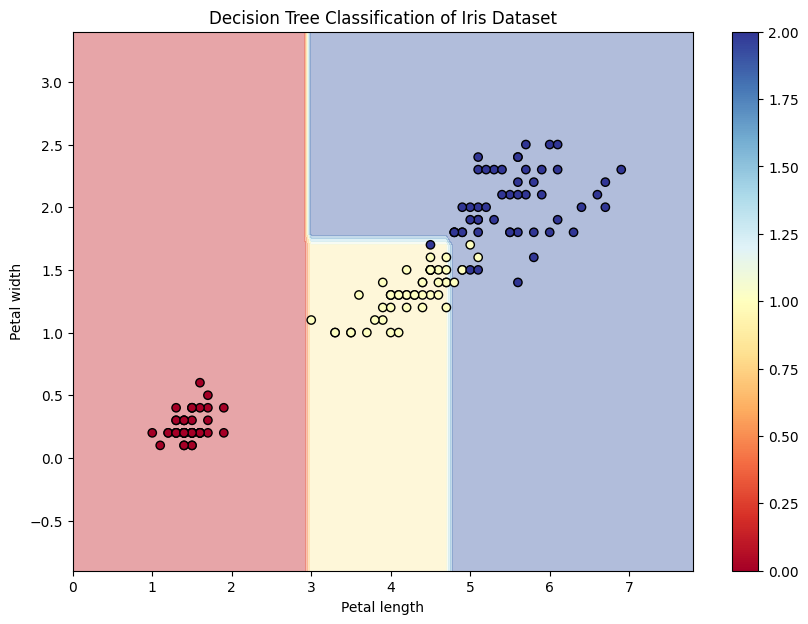

In [4]:
# Visualize the decision boundaries
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Decision Tree Classification of Iris Dataset')
    plt.colorbar(scatter)
    plt.show()

plot_decision_boundaries(X, y, dt)

This code will produce a plot showing how the decision tree partitions the feature space to classify the Iris flowers.


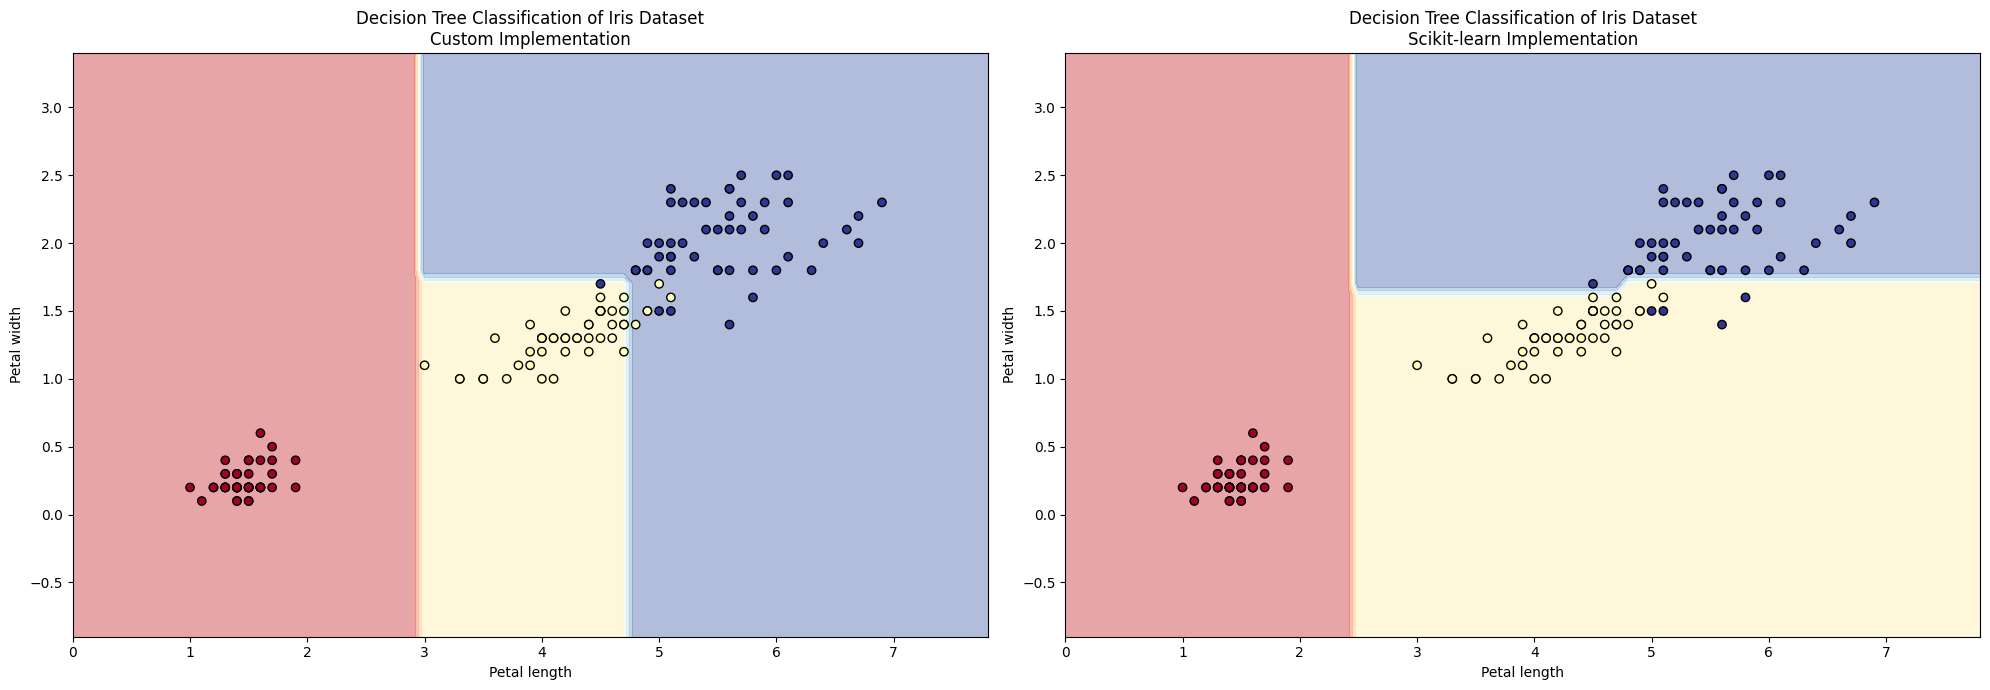

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Train the custom model
dt_custom = DecisionTree(max_depth=3)
dt_custom.fit(X_train, y_train)

# Train the sklearn model
dt_sklearn = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_sklearn.fit(X_train, y_train)

# Visualize the decision boundaries
def plot_decision_boundaries(X, y, models, titles):
    fig, axs = plt.subplots(1, 2, figsize=(20, 7))

    for ax, model, title in zip(axs, models, titles):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')
        ax.set_xlabel('Petal length')
        ax.set_ylabel('Petal width')
        ax.set_title(f'Decision Tree Classification of Iris Dataset\n{title}')

    plt.tight_layout()
    plt.show()

# Plot decision boundaries for both models
plot_decision_boundaries(X, y, [dt_custom, dt_sklearn], ['Custom Implementation', 'Scikit-learn Implementation'])

In [6]:
# Evaluate and compare the models
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    accuracy = np.mean(predictions == y)
    return accuracy

print("Custom Model Accuracy:", evaluate_model(dt_custom, X_test, y_test))
print("Scikit-learn Model Accuracy:", evaluate_model(dt_sklearn, X_test, y_test))

Custom Model Accuracy: 0.9666666666666667
Scikit-learn Model Accuracy: 1.0


💡 **Tip:** Visualizing decision boundaries can provide valuable insights into how your model is making predictions and where it might be making mistakes.


### <a id='toc4_3_'></a>[Interpreting the Results](#toc0_)


Looking at the visualization:
1. Notice how the decision boundaries are always parallel to the axes. This is because each split in a decision tree is made on a single feature.
2. The tree has created rectangular regions in the feature space, each corresponding to a different class prediction.
3. You might observe some regions where the predictions don't match all the points. This illustrates the balance between fitting the training data and generalizing to new data.


This simple implementation and visualization help us understand how decision trees make predictions and how they partition the feature space. It also highlights both the strengths (ability to create complex decision boundaries) and limitations (axis-parallel splits) of decision trees.


This hands-on example brings together the theoretical concepts we've discussed, showing how a decision tree is built and how it makes predictions. While our implementation is basic, it captures the fundamental principles of decision tree learning. In practice, you'd typically use optimized implementations from libraries like scikit-learn, but understanding these basics is crucial for effectively using and tuning decision trees in real-world applications.


In the next lecture, we'll explore more advanced topics, including techniques for optimizing and evaluating decision trees.

## <a id='toc5_'></a>[Summary and Next Steps](#toc0_)

In this lecture, we've explored the fundamentals of decision trees for classification. Let's recap the key points:

1. **Decision Tree Basics:**
   - We learned about the structure of decision trees, including root nodes, internal nodes, branches, and leaf nodes.
   - We understood how decision trees make predictions by navigating from the root to a leaf node based on feature values.

2. **Building Decision Trees:**
   - We explored the top-down induction process and recursive partitioning.
   - We implemented a basic decision tree algorithm using entropy and information gain as splitting criteria.

3. **Splitting Criteria:**
   - We studied entropy and information gain in detail.
   - We briefly touched on Gini impurity as an alternative splitting criterion.

4. **Implementation and Visualization:**
   - We created a custom implementation of a decision tree classifier.
   - We visualized decision boundaries to understand how decision trees partition the feature space.

5. **Comparison with Scikit-learn:**
   - We compared our custom implementation with scikit-learn's optimized version.
   - We observed similarities and differences in the resulting decision boundaries and model performance.


🔑 **Key Takeaway:** Decision trees are powerful, interpretable models that can capture complex patterns in data. However, they also have limitations, such as a tendency to overfit if not properly constrained.


In our next lecture, we'll delve deeper into optimizing and evaluating decision trees. We'll cover:

1. **Pruning Techniques:** Methods to prevent overfitting, including pre-pruning and post-pruning.
2. **Handling Different Types of Features:** Strategies for dealing with categorical features, continuous features, and missing values.
3. **Advantages and Disadvantages:** A comprehensive look at the strengths and weaknesses of decision trees.
4. **Feature Importance:** How decision trees can be used to assess the relevance of different features.
5. **Hyperparameter Tuning:** Techniques for optimizing decision tree performance, including cross-validation.


🤔 **Reflection Questions:**
1. How might the choice of splitting criterion affect the structure and performance of a decision tree?
2. In what situations might decision trees be particularly well-suited or poorly-suited as a classification algorithm?
3. How could we modify our current implementation to handle categorical features or missing values?


Before the next lecture, try experimenting with different depths for your decision tree and observe how it affects the decision boundaries and model performance. This will give you a head start on understanding the importance of pruning and hyperparameter tuning.


By building on the foundations we've established in this lecture, we'll be well-prepared to explore more advanced concepts and optimization techniques in our next session. Get ready to take your understanding of decision trees to the next level!